In [1]:
# Libraries importation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

### [1. Data exploration](#1)

&nbsp;&nbsp;&nbsp;**[1.1 Overview of the datasets](#1.1)**

&nbsp;&nbsp;&nbsp;**[1.2 Countries exploration](#1.2)**

&nbsp;&nbsp;&nbsp;**[1.3 Year exploration](#1.3)**

&nbsp;&nbsp;&nbsp;**[1.4 NaNs exploration](#1.4)**

### [2. Data analysis](#2)

&nbsp;&nbsp;&nbsp;**[2.1 Merge countries datasets](#2.1)**

&nbsp;&nbsp;&nbsp;**[2.2 Year evolution of CO2 emissions per country for different sources](#2.2)**

&nbsp;&nbsp;&nbsp;**[2.3 Highest ghg-emitting sector per country per year, comparison between years 1990 and 2019](#2.3)**

# 1. Data exploration <a class = anchor id="1"></a>

## 1.1 Overview of the datasets <a class = anchor id="1.1"></a>

In [2]:
# Load and display first file

world_co2 = pd.read_csv('owid-co2-data.csv')
display(world_co2)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [3]:
# Load and display second file

sector_co2 = pd.read_csv('ghg-emissions-by-sector.csv')
display(sector_co2)

,Entity,Code,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
0,Afghanistan,AFG,1990,8.070000e+06,-2.390000e+06,1.230000e+06,5.000000e+04,4.100000e+05,1.670000e+06,1.700000e+05,8.000000e+04,280000.001192,0.000000,19999.999553
1,Afghanistan,AFG,1991,8.400000e+06,-2.390000e+06,1.320000e+06,6.000000e+04,4.000000e+05,1.550000e+06,1.700000e+05,7.000000e+04,239999.994636,0.000000,19999.999553
2,Afghanistan,AFG,1992,8.410000e+06,-2.390000e+06,1.400000e+06,6.000000e+04,3.700000e+05,7.700000e+05,1.600000e+05,3.000000e+04,200000.002980,0.000000,19999.999553
3,Afghanistan,AFG,1993,8.490000e+06,-2.390000e+06,1.490000e+06,6.000000e+04,3.600000e+05,7.400000e+05,1.600000e+05,3.000000e+04,159999.996424,0.000000,19999.999553
4,Afghanistan,AFG,1994,8.520000e+06,-2.390000e+06,1.580000e+06,6.000000e+04,3.400000e+05,7.100000e+05,1.600000e+05,2.000000e+04,119999.997318,0.000000,19999.999553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,Zimbabwe,ZWE,2015,1.143000e+07,1.161000e+07,2.430000e+06,1.660000e+06,1.110000e+06,2.650000e+06,7.250000e+06,2.590000e+06,660000.026226,920000.016689,70000.000298
6146,Zimbabwe,ZWE,2016,1.051000e+07,8.740000e+07,2.480000e+06,1.780000e+06,1.110000e+06,2.250000e+06,6.260000e+06,2.650000e+06,680000.007153,800000.011921,129999.995232
6147,Zimbabwe,ZWE,2017,1.080000e+07,8.729000e+07,2.540000e+06,1.890000e+06,1.140000e+06,2.310000e+06,5.440000e+06,2.680000e+06,699999.988079,810000.002384,159999.996424
6148,Zimbabwe,ZWE,2018,1.108000e+07,8.738000e+07,2.590000e+06,1.970000e+06,1.200000e+06,2.970000e+06,6.630000e+06,2.740000e+06,709999.978542,939999.997616,189999.997616


## 1.2 Countries exploration <a class = anchor id="1.2"></a>

In [4]:
# Names present in the first dataset

print('World region names and their count:')
world_co2['country'].value_counts().sort_values()

World region names and their count:


Kuwaiti Oil Fires (GCP)             1
Leeward Islands (GCP)               7
French Equatorial Africa (GCP)      9
French West Africa (GCP)            9
Christmas Island                   14
                                 ... 
Mauritania                        272
Martinique                        272
Low-income countries              272
Andorra                           272
South America                     272
Name: country, Length: 269, dtype: int64

In [5]:
# Names present in the second dataset

print('World region names and their count:')
sector_co2['Entity'].value_counts().sort_values()

World region names and their count:


Afghanistan    30
Azerbaijan     30
Albania        30
Algeria        30
Andorra        30
               ..
Venezuela      30
Vietnam        30
World          30
Ukraine        30
Zimbabwe       30
Name: Entity, Length: 205, dtype: int64

The dataset ghg-emission-by-sector.csv regroups a total of 205 world regions while owid-co2-data.csv has a total of 269 world regions.

In [6]:
# Check common names to both datasets

names_one = list(world_co2['country'].value_counts().index)
names_two = list(sector_co2['Entity'].value_counts().index)
common_elements = set(names_one) & set(names_two)

print('There are', len(common_elements), 'common names between the two files. Great!'
      '\nAll the names present in ghg-emission-by-sector.csv are thus also present in owid-co2-data.csv. Nice.')
print('\nThe world regions which are only present in owid-co2-data.csv are: \n\n', list(set(names_one) ^ set(names_two)),
     '\n\nWe observe it is maily continents and islands, or regions that are not countries. We could get rid of them.')

There are 205 common names between the two files. Great!
All the names present in ghg-emission-by-sector.csv are thus also present in owid-co2-data.csv. Nice.

The world regions which are only present in owid-co2-data.csv are: 

 ['Kosovo', 'New Caledonia', 'Puerto Rico', 'Christmas Island', 'American Samoa', 'Falkland Islands', 'Isle of Man', 'OECD (GCP)', 'Panama Canal Zone (GCP)', 'Sint Maarten (Dutch part)', 'Curacao', 'Bonaire Sint Eustatius and Saba', 'Taiwan', 'Antarctica', 'North America (GCP)', 'French West Africa (GCP)', 'Africa (GCP)', 'Palestine', 'St. Kitts-Nevis-Anguilla (GCP)', 'French Guiana', 'Europe (GCP)', 'Ryukyu Islands (GCP)', 'Kuwaiti Oil Fires (GCP)', 'Turks and Caicos Islands', 'Saint Helena', 'Asia (GCP)', 'Hong Kong', 'International transport', 'Reunion', 'Non-OECD (GCP)', 'Netherlands Antilles', 'Macao', 'Oceania (GCP)', 'Jersey', 'Middle East (GCP)', 'Anguilla', 'United States Virgin Islands', 'Saint Martin (French part)', 'Faeroe Islands', 'Western Sahara'

In [7]:
# Keep only the overlapping names

world_co2_overlap = world_co2[world_co2['country'].isin(common_elements)]

Now, we have 205 names, however there are only 193 countries in the world.  
After a quick look to the names, it appears that in addition to country names, continents are present as well as 'low-/middle-/high-income countries'.  
In addition, 'European Union' and 'World' are present.

In [8]:
# Distinction between countries and continents

continents_reference = ['Africa', 'Antarctica', 'Asia', 'Oceania', 'Europe', 'North America', 'South America']
incomes_reference = ['Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries', 'High-income countries']

continents = list(set(continents_reference) & set(common_elements))
incomes_classification = list(set(incomes_reference) & set(common_elements))
countries = list(((set(common_elements) ^ set(continents)) ^ set(incomes_classification)) ^ set(['World', 'European Union (27)']))

print('There are', len(continents), 'continents:', continents)
print('\nThere are', len(incomes_classification), 'classifications:', incomes_classification)
print('\nThere are', len(countries), 'countries:\n', countries)

There are 6 continents: ['Europe', 'South America', 'Asia', 'Oceania', 'Africa', 'North America']

There are 4 classifications: ['Lower-middle-income countries', 'Upper-middle-income countries', 'High-income countries', 'Low-income countries']

There are 193 countries:
 ['Ireland', 'Hungary', 'Bulgaria', 'Democratic Republic of Congo', 'Israel', 'Albania', 'Philippines', 'Uruguay', 'Dominica', 'Eritrea', 'Jordan', 'Maldives', 'Lithuania', 'Morocco', 'New Zealand', 'Norway', 'Burkina Faso', 'Tajikistan', 'Syria', 'Brazil', 'Congo', 'Colombia', 'Montenegro', 'Botswana', 'Honduras', 'United States', 'Malaysia', 'Mauritania', 'Germany', 'Algeria', 'Bosnia and Herzegovina', 'Malta', 'Sweden', 'Jamaica', 'Chad', 'Namibia', 'Cuba', 'Slovenia', 'Canada', 'Micronesia (country)', 'Argentina', 'Guinea', 'Madagascar', 'Japan', 'Iceland', 'Niue', 'Zambia', 'Georgia', 'Cambodia', 'Kenya', 'Saint Kitts and Nevis', 'Uzbekistan', 'Azerbaijan', 'Grenada', 'Serbia', 'Kuwait', 'Nicaragua', 'Kiribati', 'Co

In [9]:
# Separate in 4 datasets: countries data, continents data, income-classified data, global world data.

countries_co2 = world_co2_overlap[world_co2_overlap['country'].isin(countries)]
continents_co2 = world_co2_overlap[world_co2_overlap['country'].isin(continents)]
income_class_co2 = world_co2_overlap[world_co2_overlap['country'].isin(incomes_classification)]
global_co2 = world_co2_overlap[world_co2_overlap['country'].isin(['World'])]

countries_sector = sector_co2[sector_co2['Entity'].isin(countries)]
continents_sector = sector_co2[sector_co2['Entity'].isin(continents)]
income_class_sector = sector_co2[sector_co2['Entity'].isin(incomes_classification)]
global_sector = sector_co2[sector_co2['Entity'].isin(['World'])]

## 1.3 Year exploration <a class = anchor id="1.3"></a>

Only the countries have been explored here.

In [10]:
# Go through years present in each file and see how many entries they have

print('Years in owid-co2-data.csv: ')
display(countries_co2.year.value_counts().sort_index())

print('\nYears in owid-co2-data.csv which have entries for every country (193 countries): ')
display((countries_co2.year.value_counts()[countries_co2.year.value_counts().ge(193)]).sort_index())

print('\nYears in ghg-emission-by-sector.csv :')
display(countries_sector.Year.value_counts().sort_index())

Years in owid-co2-data.csv: 


1750     13
1751     13
1752     13
1753     13
1754     13
       ... 
2017    193
2018    193
2019    193
2020    193
2021    193
Name: year, Length: 272, dtype: int64


Years in owid-co2-data.csv which have entries for every country (193 countries): 


1990    193
1991    193
1992    193
1993    193
1994    193
1995    193
1996    193
1997    193
1998    193
1999    193
2000    193
2001    193
2002    193
2003    193
2004    193
2005    193
2006    193
2007    193
2008    193
2009    193
2010    193
2011    193
2012    193
2013    193
2014    193
2015    193
2016    193
2017    193
2018    193
2019    193
2020    193
2021    193
Name: year, dtype: int64


Years in ghg-emission-by-sector.csv :


1990    193
1991    193
1992    193
1993    193
1994    193
1995    193
1996    193
1997    193
1998    193
1999    193
2000    193
2001    193
2002    193
2003    193
2004    193
2005    193
2006    193
2007    193
2008    193
2009    193
2010    193
2011    193
2012    193
2013    193
2014    193
2015    193
2016    193
2017    193
2018    193
2019    193
Name: Year, dtype: int64

For owid-co2-data.csv, the years range from 1750 until 2021. However, only years 1990 to 2021 have entries for each country.

For ghg-emissions-by-sector.csv, years range from 1990 until 2019 and contains entry for each country.

We can thus focus our analysis to the time period 1990-2019.

In [11]:
# Keep only time period 1990-2019

countries_co2 = countries_co2[countries_co2['year'].isin(np.linspace(1990, 2019, 30))]

## 1.4 NaNs exploration <a class = anchor id="1.4"></a>

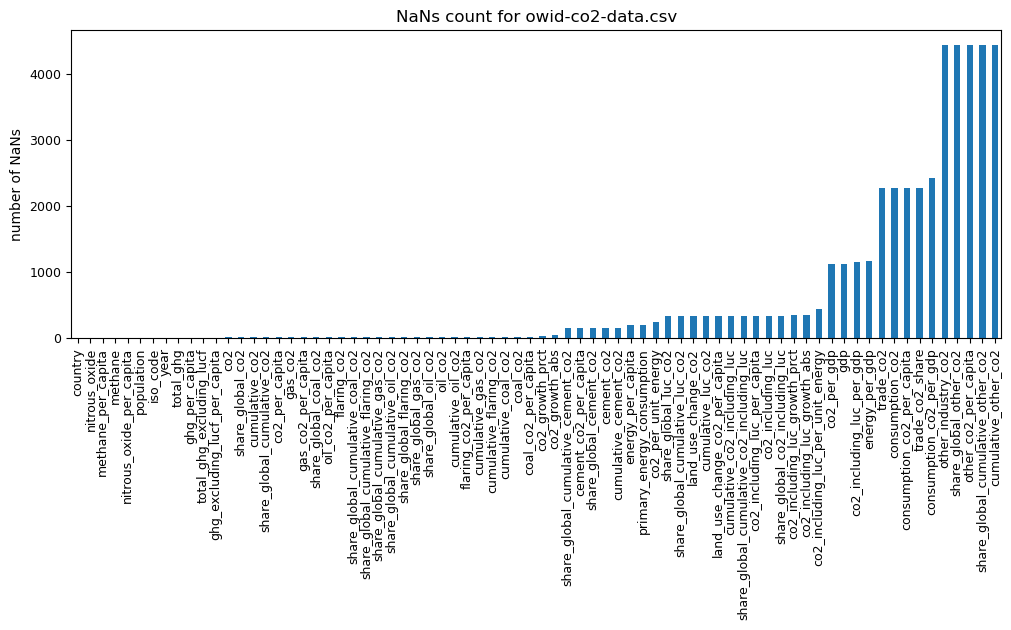

In [12]:
# For each column, sum up the NaNs, sort them and plot it in a barchart

countries_co2.isna().sum().sort_values().plot(kind='bar', figsize=(12, 4), fontsize=9)
plt.title('NaNs count for owid-co2-data.csv')
plt.ylabel('number of NaNs');

The column `total_ghg` does not contain any NaNs.  
The columns `co2`, `gas_co2`, `coal_co2`, `flaring_co2`, `oil_co2` contain a small number of NaNs (around 20), while the columns `cement_co2`, `land_use_change_co2`, and `trade_co2` have a bigger number of NaNs.  
The column `other_industry_co2` contains one of the highest number of NaNs.

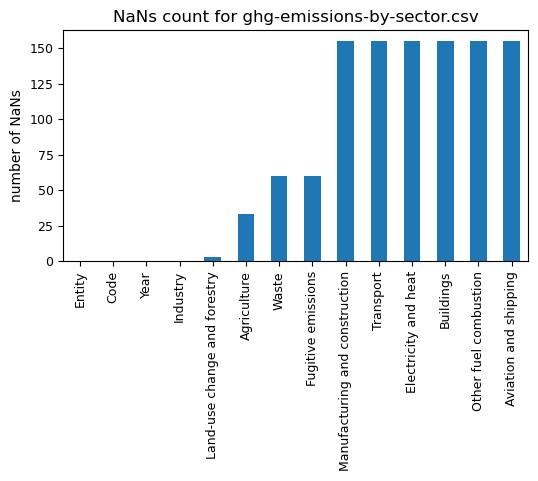

In [13]:
countries_sector.isna().sum().sort_values().plot(kind='bar', figsize=(6, 3), fontsize=9)
plt.title('NaNs count for ghg-emissions-by-sector.csv')
plt.ylabel('number of NaNs');

# 2. Data analysis <a class = anchor id="2"></a>

## 2.1 Merge countries datasets <a class = anchor id="2.1"></a>

In [14]:
# Set the same column names for the common columns

countries_sector.rename(columns={"Entity": "country", "Code": "iso_code", "Year": "year"}, inplace=True)

# Reset the indices

countries_co2.reset_index(drop=True, inplace=True)
countries_sector.reset_index(drop=True, inplace=True)

# Merge 

merged = pd.merge(countries_co2, countries_sector, how="inner", on=["country", "iso_code", "year"])
display(merged)

/var/folders/88/yy00sf_x3pl6hnnmlcr58hdw0000gn/T/ipykernel_86477/198293228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_sector.rename(columns={"Entity": "country", "Code": "iso_code", "Year": "year"}, inplace=True)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
0,Afghanistan,1990,AFG,10694804.0,1.306598e+10,0.046,0.004,2.024,-0.741,-26.784,...,-2.390000e+06,1.230000e+06,5.000000e+04,4.100000e+05,1.670000e+06,1.700000e+05,8.000000e+04,280000.001192,0.000000,19999.999553
1,Afghanistan,1991,AFG,10745168.0,1.204736e+10,0.046,0.004,1.914,-0.110,-5.435,...,-2.390000e+06,1.320000e+06,6.000000e+04,4.000000e+05,1.550000e+06,1.700000e+05,7.000000e+04,239999.994636,0.000000,19999.999553
2,Afghanistan,1992,AFG,12057436.0,1.267754e+10,0.046,0.004,1.482,-0.432,-22.580,...,-2.390000e+06,1.400000e+06,6.000000e+04,3.700000e+05,7.700000e+05,1.600000e+05,3.000000e+04,200000.002980,0.000000,19999.999553
3,Afghanistan,1993,AFG,14003764.0,9.834581e+09,0.047,0.003,1.487,0.005,0.330,...,-2.390000e+06,1.490000e+06,6.000000e+04,3.600000e+05,7.400000e+05,1.600000e+05,3.000000e+04,159999.996424,0.000000,19999.999553
4,Afghanistan,1994,AFG,15455560.0,7.919857e+09,0.047,0.003,1.454,-0.033,-2.227,...,-2.390000e+06,1.580000e+06,6.000000e+04,3.400000e+05,7.100000e+05,1.600000e+05,2.000000e+04,119999.997318,0.000000,19999.999553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5785,Zimbabwe,2015,ZWE,14154937.0,2.102745e+10,0.585,0.041,12.255,0.309,2.585,...,1.161000e+07,2.430000e+06,1.660000e+06,1.110000e+06,2.650000e+06,7.250000e+06,2.590000e+06,660000.026226,920000.016689,70000.000298
5786,Zimbabwe,2016,ZWE,14452705.0,2.096179e+10,0.461,0.032,10.533,-1.722,-14.047,...,8.740000e+07,2.480000e+06,1.780000e+06,1.110000e+06,2.250000e+06,6.260000e+06,2.650000e+06,680000.007153,800000.011921,129999.995232
5787,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,8.729000e+07,2.540000e+06,1.890000e+06,1.140000e+06,2.310000e+06,5.440000e+06,2.680000e+06,699999.988079,810000.002384,159999.996424
5788,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,8.738000e+07,2.590000e+06,1.970000e+06,1.200000e+06,2.970000e+06,6.630000e+06,2.740000e+06,709999.978542,939999.997616,189999.997616


In [15]:
# sanity check : 74 (data n°1) + 14 (data n°2) - 3 (common) = 85 columns, good.

## 2.2 Year evolution of CO2 emissions per country for different sources <a class = anchor id="2.2"></a>

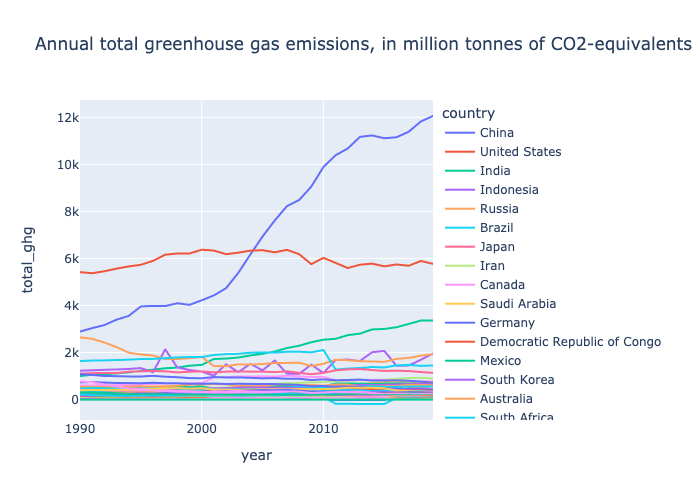

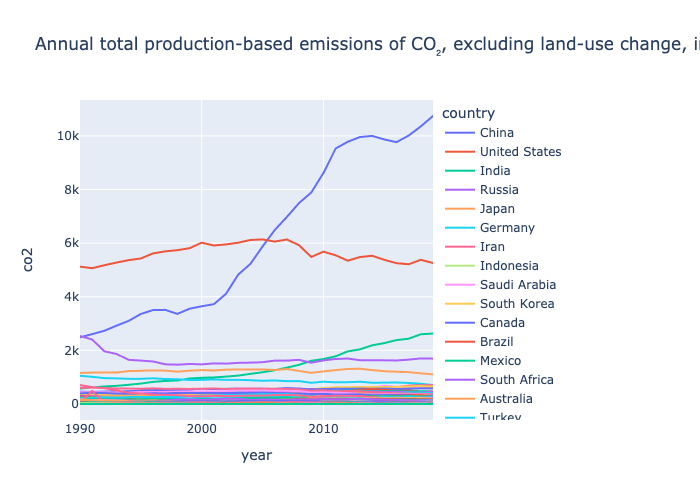

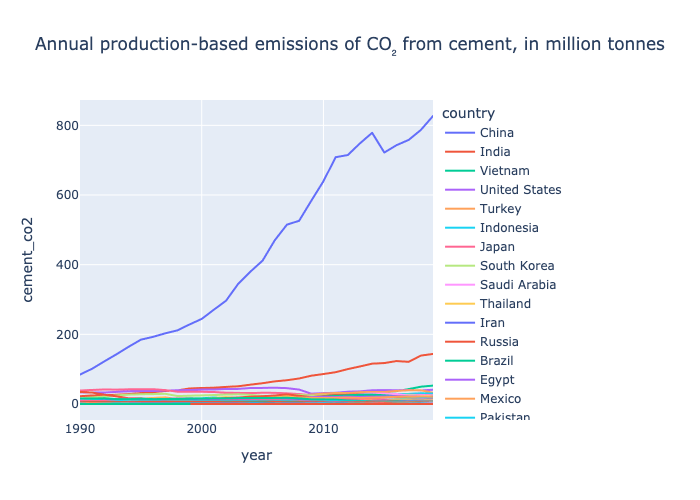

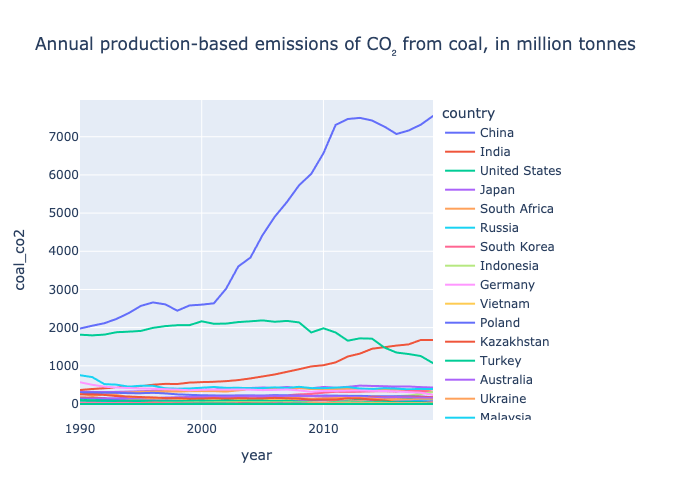

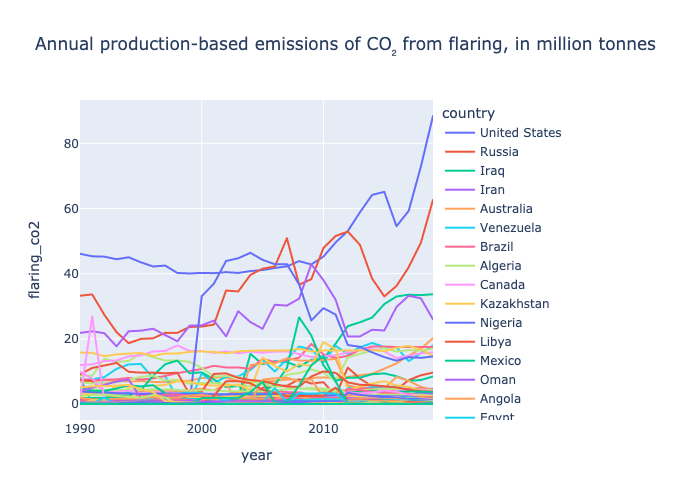

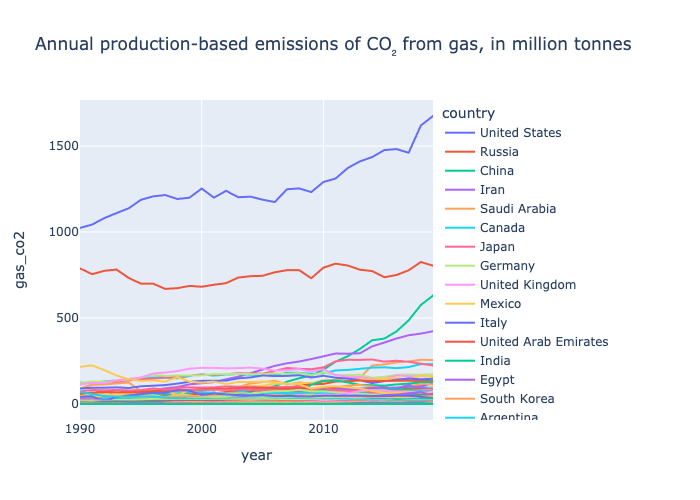

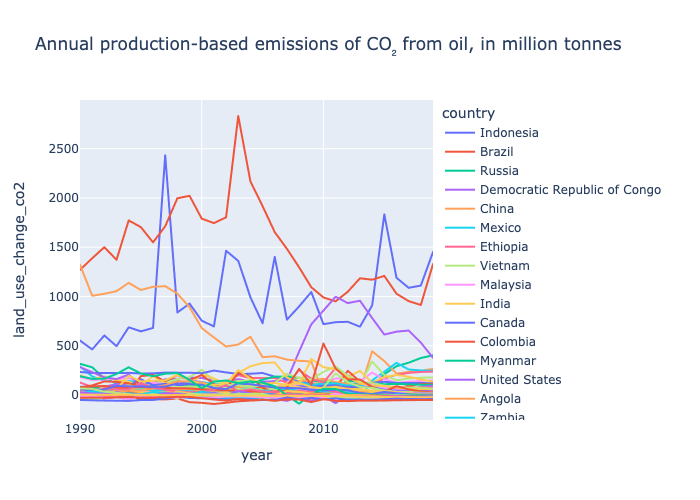

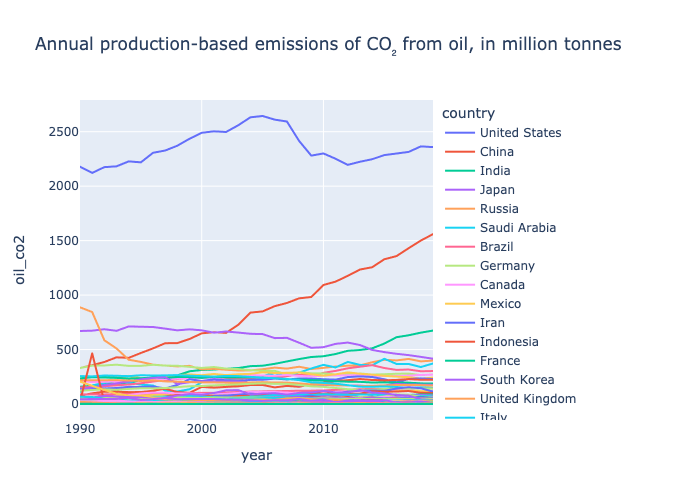

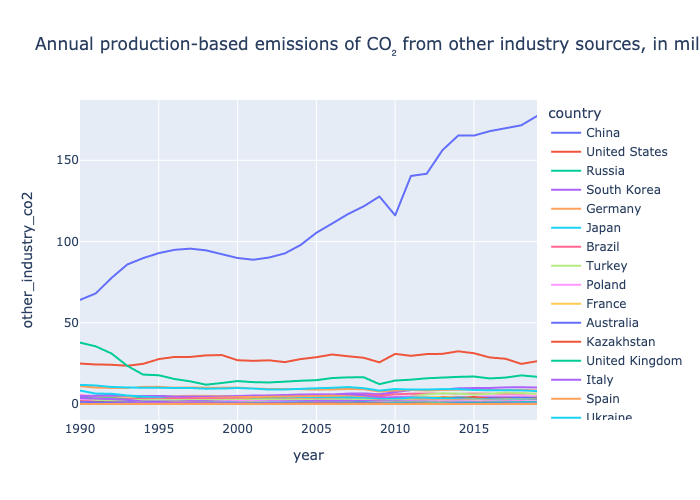

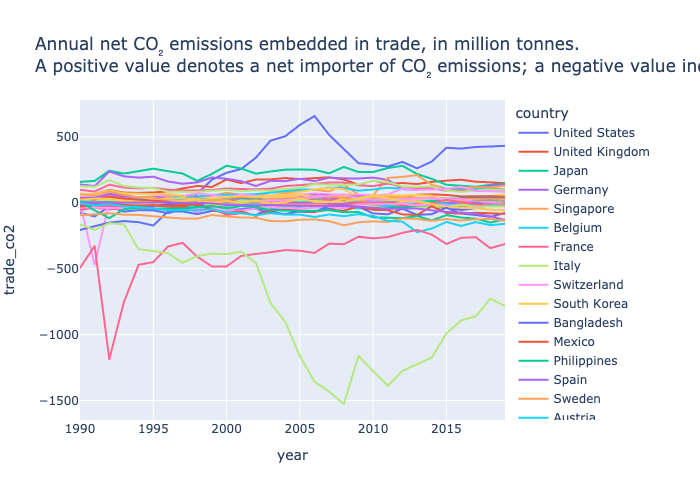

In [16]:
# Plots can be interactive! Names are displayed from biggest emitter to smallest emitter.
# For GitHub visualization matter, plots are here set not to be interactive.
# To make them interactive replace fig.show("png") by fig.show()

def plot(data, x, y, color, title):
    fig = px.line(data[[color, x, y]].sort_values(by=[x, y], ascending=False).dropna(), x=x, y=y, color=color, title=title)
    fig.show("png")
plot(merged, x='year', y='total_ghg', color='country', title='Annual total greenhouse gas emissions, in million tonnes of CO2-equivalents')
plot(merged, x='year', y='co2', color='country', title='Annual total production-based emissions of CO₂, excluding land-use change, in million tonnes.')
plot(merged, x='year', y='cement_co2', color='country', title = 'Annual production-based emissions of CO₂ from cement, in million tonnes')
plot(merged, x='year', y='coal_co2', color='country', title = 'Annual production-based emissions of CO₂ from coal, in million tonnes')
plot(merged, x='year', y='flaring_co2', color='country', title = 'Annual production-based emissions of CO₂ from flaring, in million tonnes')
plot(merged, x='year', y='gas_co2', color='country', title = 'Annual production-based emissions of CO₂ from gas, in million tonnes')
plot(merged, x='year', y='land_use_change_co2', color='country', title = 'Annual production-based emissions of CO₂ from oil, in million tonnes')
plot(merged, x='year', y='oil_co2', color='country', title = 'Annual production-based emissions of CO₂ from oil, in million tonnes')
plot(merged, x='year', y='other_industry_co2', color='country', title = 'Annual production-based emissions of CO₂ from other industry sources, in million tonnes')
plot(merged, x='year', y='trade_co2', color='country', title = 'Annual net CO₂ emissions embedded in trade, in million tonnes. <br>A positive value denotes a net importer of CO₂ emissions; a negative value indicates a net exporter.')

## 2.3 Highest ghg-emitting sector per country per year, comparison between years 1990 and 2019 <a class = anchor id="2.3"></a>

In [17]:
# Iterate through every sector to find the one with highest value, for each row, and store these info into a new column

all_sectors = ['Agriculture', 'Land-use change and forestry', 'Waste', 'Industry',
               'Manufacturing and construction', 'Transport', 'Electricity and heat',
               'Buildings', 'Fugitive emissions', 'Other fuel combustion', 'Aviation and shipping']

def find_highest_sector(row):
    sector = np.nan
    highest_emission = 0.
    for i, sect in enumerate(all_sectors):
        if row[i] >= highest_emission:
            highest_emission = row[i]
            sector = sect
    return sector, highest_emission

merged['highest_sector_and_emission'] = merged[all_sectors].apply(lambda row: find_highest_sector(row), axis=1)

# Separate the new column (highest sector, highest emission) into two distinct columns

vectorized_split = np.vectorize(lambda x: (x[0],x[1]))
sector_name, sector_emission = vectorized_split(merged[['highest_sector_and_emission']].values)
sector_name, sector_emission = sector_name[:,0], sector_emission[:,0]
merged['highest_sector'] = sector_name
merged['highest_emission'] = sector_emission
merged.drop('highest_sector_and_emission', axis=1, inplace=True)

# Display new columns

display(merged[['country', 'year', 'highest_sector', 'highest_emission']])

,country,year,highest_sector,highest_emission
0,Afghanistan,1990,Agriculture,8.070000e+06
1,Afghanistan,1991,Agriculture,8.400000e+06
2,Afghanistan,1992,Agriculture,8.410000e+06
3,Afghanistan,1993,Agriculture,8.490000e+06
4,Afghanistan,1994,Agriculture,8.520000e+06
...,...,...,...,...
5785,Zimbabwe,2015,Land-use change and forestry,1.161000e+07
5786,Zimbabwe,2016,Land-use change and forestry,8.740000e+07
5787,Zimbabwe,2017,Land-use change and forestry,8.729000e+07
5788,Zimbabwe,2018,Land-use change and forestry,8.738000e+07


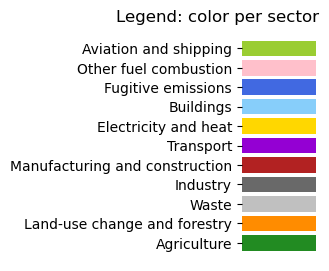

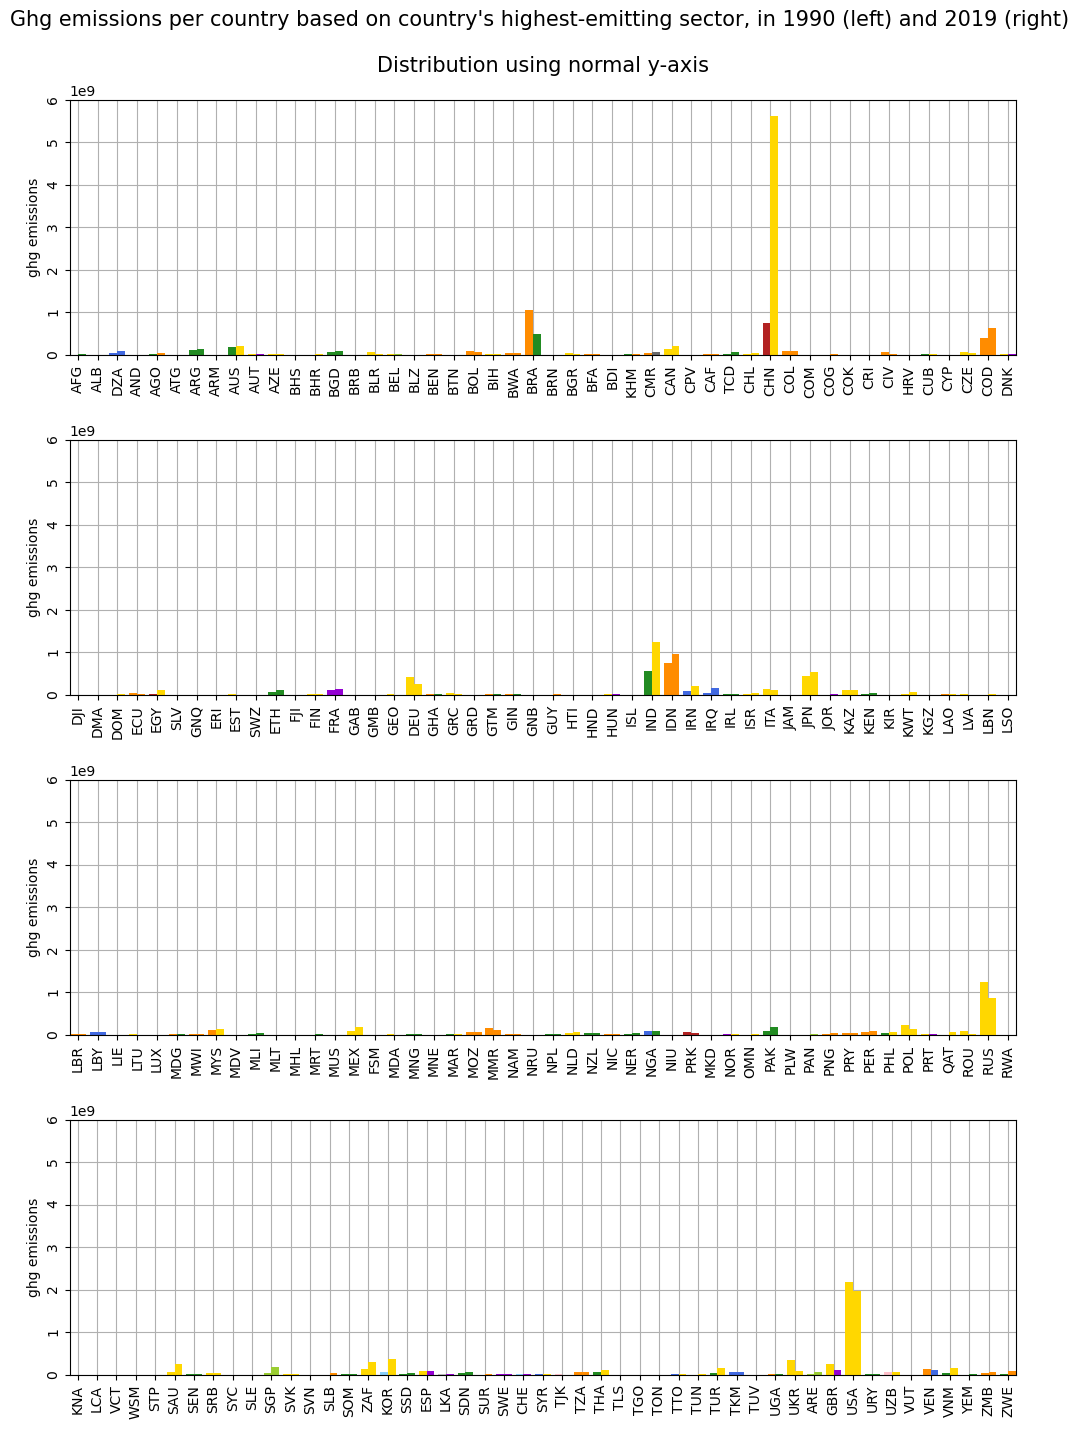

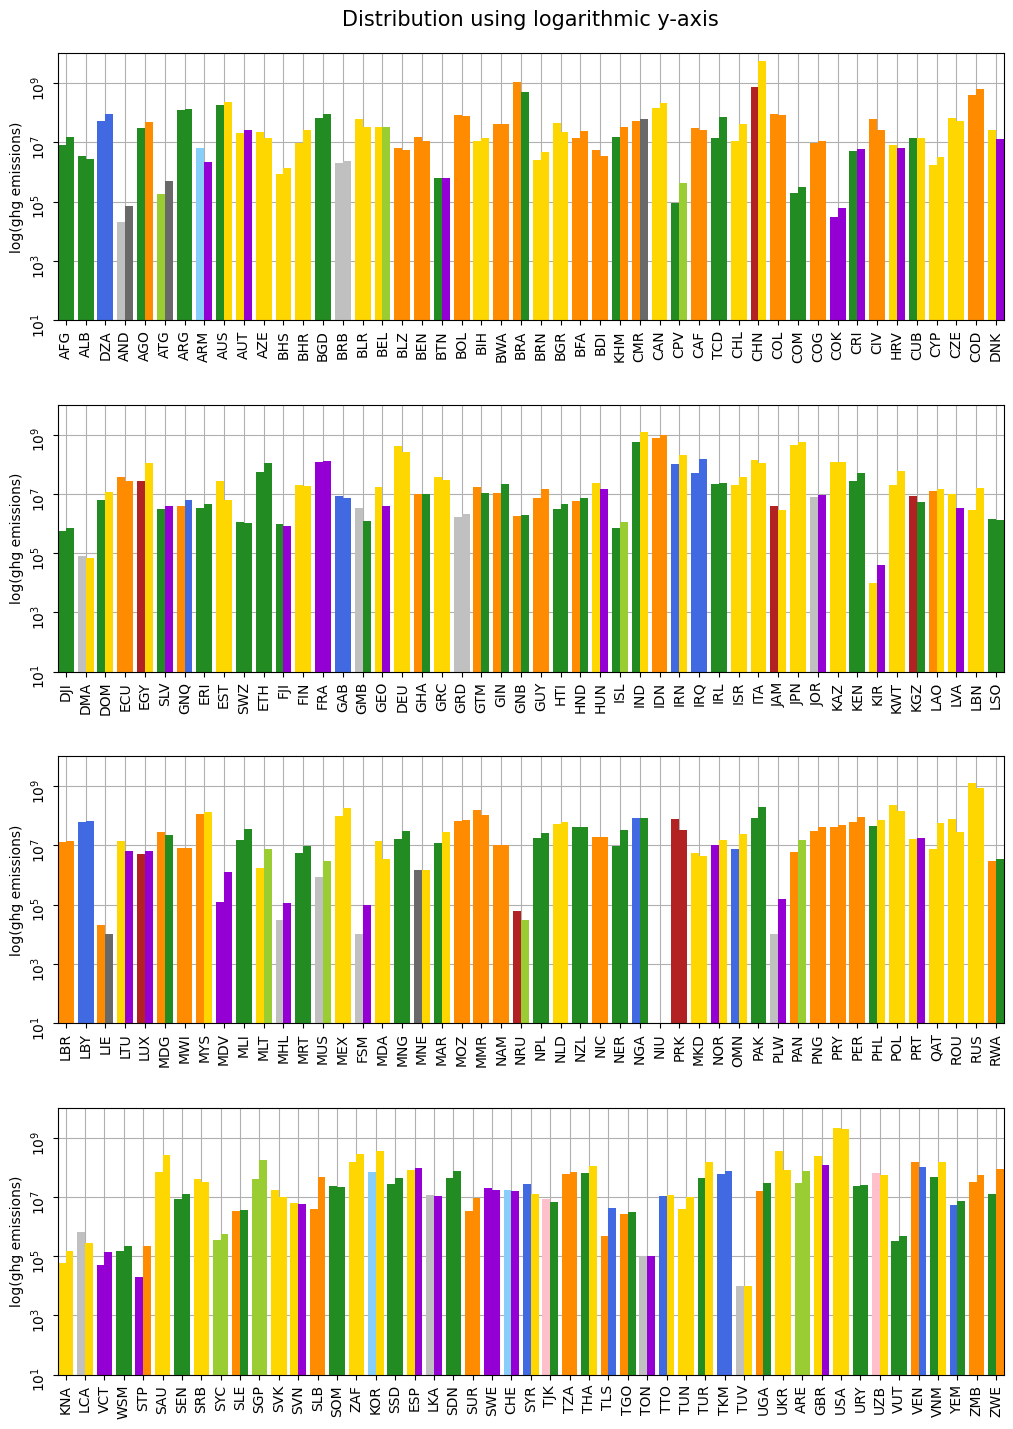

In [18]:
# comparison year 1990 and year 2019

before = merged[merged['year']==1990]
after = merged[merged['year']==2019]

# set colors for each sector
colors_per_sector = {
    'Agriculture': 'forestgreen',
    'Land-use change and forestry': 'darkorange',
    'Waste': 'silver',
    'Industry': 'dimgray',
    'Manufacturing and construction': 'firebrick',
    'Transport': 'darkviolet',
    'Electricity and heat': 'gold',
    'Buildings': 'lightskyblue',
    'Fugitive emissions': 'royalblue',
    'Other fuel combustion': 'pink',
    'Aviation and shipping': 'yellowgreen'
}

colors_sectors_before = []
for i, sect in enumerate(list(before.highest_sector)):
    colors_sectors_before.append(colors_per_sector[sect])
    
colors_sectors_after = []
for i, sect in enumerate(list(after.highest_sector)):
    colors_sectors_after.append(colors_per_sector[sect])

# plot color-legend
plt.figure(figsize=(1, 3))
plt.barh(list(colors_per_sector.keys()), width=1, color = colors_per_sector.values())
plt.title('Legend: color per sector', loc='right')
plt.box(False)
plt.xticks([]);

# plot before (left) and after (right) for each country

fig, ax= plt.subplots(4, 1, figsize=(11, 15))
ax[0].set_title('Ghg emissions per country based on country\'s highest-emitting sector, in 1990 (left) and 2019 (right) \n\nDistribution using normal y-axis', pad=20, fontsize=15)
plt.tight_layout(pad=4)
for i in range(4):
    
    # this is just to make 4 subplots with approx 1/4 of the countries
    end, leng = 0, 48
    x_axis = np.arange(leng)
    if i%4 == 3:
        end, x_axis = 1, np.arange(49)
    
    ax[i].grid()
    ax[i].set_axisbelow(True)
    ax[i].bar(x_axis - 0.2, before.highest_emission.iloc[leng*i:leng*(i+1)+end], width=0.4, color=colors_sectors_before[leng*i:leng*(i+1)+end], log=False)
    ax[i].bar(x_axis + 0.2, after.highest_emission.iloc[leng*i:leng*(i+1)+end], width=0.4, color=colors_sectors_after[leng*i:leng*(i+1)+end], log=False)
    ax[i].tick_params(labelrotation=90)
    ax[i].margins(x=0)
    ax[i].set_ylim([0, 6e9])
    ax[i].set_xticks(x_axis, before.iso_code.iloc[leng*i:leng*(i+1)+end])
    ax[i].set_ylabel('ghg emissions')

fig, ax= plt.subplots(4, 1, figsize=(11, 15))
ax[0].set_title('Distribution using logarithmic y-axis', pad=20, fontsize=15)
plt.tight_layout(pad=4)
for i in range(4):
    
    # this is just to make 4 subplots with approx 1/4 of the countries
    end, leng = 0, 48
    x_axis = np.arange(leng)
    if i%4 == 3:
        end, x_axis = 1, np.arange(49)

    ax[i].grid()
    ax[i].set_axisbelow(True)
    ax[i].bar(x_axis - 0.2, before.highest_emission.iloc[leng*i:leng*(i+1)+end], width=0.4, color=colors_sectors_before[leng*i:leng*(i+1)+end], log=True)
    ax[i].bar(x_axis + 0.2, after.highest_emission.iloc[leng*i:leng*(i+1)+end], width=0.4, color=colors_sectors_after[leng*i:leng*(i+1)+end], log=True)
    ax[i].tick_params(labelrotation=90)
    ax[i].margins(x=0)
    ax[i].set_ylim([10e0, 10e9])
    ax[i].set_xticks(x_axis, before.iso_code.iloc[leng*i:leng*(i+1)+end])
    ax[i].set_ylabel('log(ghg emissions)')